In [8]:
# improt dependencies
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import statistics as stats
from environs import Env
from urllib.request import urlopen
import json

# import environmental variables
env = Env()
env.read_env("../.env")
census_api_key = env("CENSUS_API_KEY", default=None)

# load county geodata 
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [9]:
# load data
county_df = pd.read_csv('../data/processed/county_data.csv',dtype={'fips': str})
state_df = pd.read_csv('../data/processed/state_data.csv',dtype={'fips': str})

In [10]:
state_df.columns

Index(['fips', 'state', 'adult_obesity_pct', 'food_environment_index',
       'exercise_access_pct', 'excess_drinking_pct', 'uninsured_num',
       'uninsured_pct', 'primary_care_phys_rate', 'prevent_hospital_rate',
       'income_inequal_80pct', 'income_inequal_20pct', 'income_inequal_ratio',
       'early_death_count', 'early_death_years_lost', 'mental_health_ratio',
       'mental_health_rate', 'mental_health_num', 'dentists_ratio',
       'dentists_num', 'dentists_rate', 'unemployment_num', 'unemployment_pct',
       'poor_physical_health_avg_days', 'housing_inad_facil',
       'housing_overcrowding', 'longitude', 'latitude', 'population',
       'median_income'],
      dtype='object')

## Map Type 1: Choropleth

In [11]:
def state_plot(color_param,bar_title, title):
    fig = px.choropleth(
        state_df,
        geojson='https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json',
        locations='fips',
        color=color_param,
        hover_name='state',
        color_continuous_scale="RdPu"
    )

    # Fit the geographic bounds to the data
    fig.update_geos(fitbounds="locations")

    # Set the layout and title
    fig.update_layout(
        title_text=title,
        coloraxis_colorbar=dict(title=bar_title),
    geo_scope='usa'  # Focus on the USA
)

    # Show the figure
    fig.show()


In [12]:
state_plot('early_death_years_lost', 'Years Lost', 'Choropleth Map of Potential Years of Life Lost by State')

In [13]:
state_plot('food_environment_index', 'Food Environment Index', 'Choropleth Map of Food Envirionment Index by State')

In [14]:
state_plot('median_income','Median Income ($)', 'Choropleth Map of Median Income ($) by State')

In [15]:
state_plot('adult_obesity_pct', 'Adult Obesity Rate (%)', 'Choropleth Map of Adult Obesity (%) by State')

In [16]:
state_plot('poor_physical_health_avg_days', 'Avg Number of Poor Physical Health Days', 'Choropleth Map of Average Number of Poor Physical Health Days by State')

In [17]:
state_plot('exercise_access_pct', 'Access Rate (%)', 'Choropleth Map of Population Access to Exercise Opportunity (%) by State')

In [18]:
county_df_map = county_df.dropna(subset='early_death_years_lost')
county_df[county_df['early_death_years_lost'].isna()][['fips','early_death_years_lost']]

,fips,early_death_years_lost
67,02013,NaN
68,02016,NaN
71,02060,NaN
72,02063,NaN
73,02066,NaN
...,...,...
3054,53023,NaN
3077,53069,NaN
3155,55037,NaN
3162,55051,NaN


## Map Type 2: Scatter Plot using Lat/Long Values


In [19]:
# Get information about populations
state_pop_total = state_df['population'].sum()
state_pop_total

326569308

In [20]:
county_pop_total = county_df['population'].sum()
county_pop_total

345431686.0

In [21]:
# get contiguous US
contiguous_us_county = county_df[~county_df['state'].isin(['Alaska','Hawaii'])]

In [22]:
contiguous_county_pop_total = contiguous_us_county['population'].sum()
contiguous_county_pop_total

342702702.0

c:\Users\rosem\anaconda3\envs\myenv\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning:

invalid value encountered in sqrt



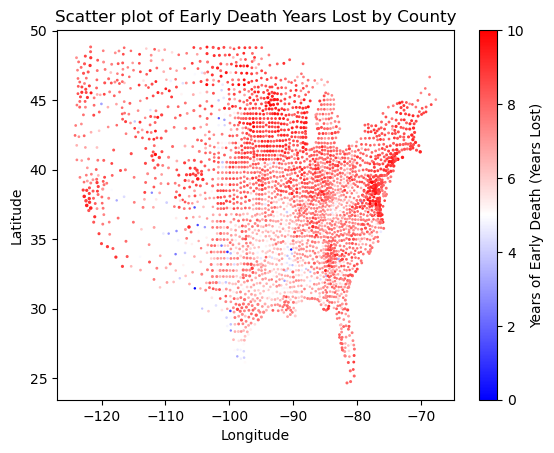

In [23]:
plt.scatter(
    contiguous_us_county['longitude'], 
    contiguous_us_county['latitude'],
    c=contiguous_us_county['food_environment_index'], # Ensure this is numeric
    cmap='bwr',  # Use a valid colormap in matplotlib
    alpha=1,
    s=contiguous_us_county['median_income']/contiguous_us_county['median_income'].median()
)

# Add a color bar to show the color scale
plt.colorbar(label='Years of Early Death (Years Lost)')

# Add labels for clarity
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot of Early Death Years Lost by County')

# Show the plot
plt.show()